In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import pylab

from scipy.stats import anderson
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import StratifiedKFold , cross_val_score
from sklearn import metrics

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('../../data/raw/SeoulBikeData.csv', encoding = 'windows-1254')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
from mylibrary.get_data import summary_table

In [4]:
summary_table(df)

,dataFeatures,dataType,null,null_pct,unique,unique_pct
0,Date,object,0,0.0,365,4.17
1,Rented Bike Count,int64,0,0.0,2166,24.73
2,Hour,int64,0,0.0,24,0.27
3,Temperature(°C),float64,0,0.0,546,6.23
4,Humidity(%),int64,0,0.0,90,1.03
5,Wind speed (m/s),float64,0,0.0,65,0.74
6,Visibility (10m),int64,0,0.0,1789,20.42
7,Dew point temperature(°C),float64,0,0.0,556,6.35
8,Solar Radiation (MJ/m2),float64,0,0.0,345,3.94
9,Rainfall(mm),float64,0,0.0,61,0.70


In [1]:
print("test")

test


Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

In [5]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
df.shape

(8760, 14)

In [35]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [23]:
df.info

<bound method DataFrame.info of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)

In [25]:
# data overview
listItem = []
for col in df.columns :
    listItem.append([col,df [col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null Count', 'Null %', 'N-Unique', 'Unique Sample'],
                     data=listItem)
df_desc

,Data Features,Data Type,Null Count,Null %,N-Unique,Unique Sample
0,Date,object,0,0.0,365,"[03/08/2018, 06/11/2018]"
1,Rented Bike Count,int64,0,0.0,2166,"[787, 676]"
2,Hour,int64,0,0.0,24,"[2, 8]"
3,Temperature(°C),float64,0,0.0,546,"[5.9, 1.3]"
4,Humidity(%),int64,0,0.0,90,"[38, 15]"
5,Wind speed (m/s),float64,0,0.0,65,"[0.8, 2.8]"
6,Visibility (10m),int64,0,0.0,1789,"[1961, 1365]"
7,Dew point temperature(°C),float64,0,0.0,556,"[-17.7, -11.4]"
8,Solar Radiation (MJ/m2),float64,0,0.0,345,"[0.45, 0.9]"
9,Rainfall(mm),float64,0,0.0,61,"[18.0, 3.0]"


In [7]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## Completeness - Dealing with Missing Data
​
.isna().sum() To get to know how many data missing values in data
​
import missingno as msno
​
import matplotlib.pyplot as plt
​
A. Missingness Types :
​
1. Missing Completely at Random (MCAR)
​
No systematic relationship between missing data and other values.
​
2. Missing at Random (MAR)
​
Systematic relationship between missinf data and other observed values
​
3. Missing Not at Random (MNAR)
​
Systematic relationship between missing data and unobserved values
​
How to deal with missing data?
​
Simple approaches:
​
1. Drop missing data
​
.dropna( )
​
2. Impute with statistical measures (mean, median, mode..)
​
pd[series].mean( )
​
.fillna({key :values})
​
More complex approaches:
​
1. Imputing using an algorithmic approach
​
2. Impute with machine learning models

In [11]:
import missingno as msno

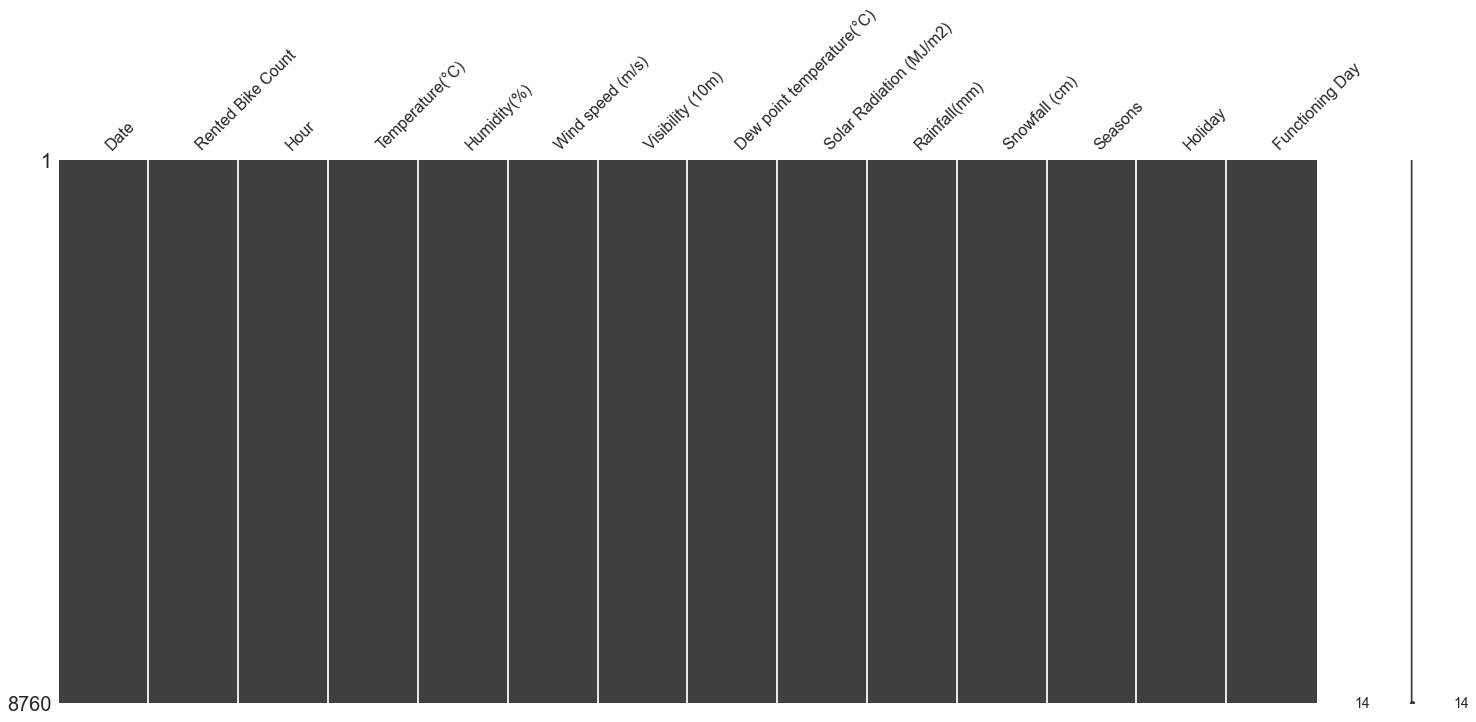

In [12]:
fig = msno.matrix(df, inline=False)
grid_ax = fig.axes

Text(0.5, 1.0, 'Solar Radiation (MJ/m2)')

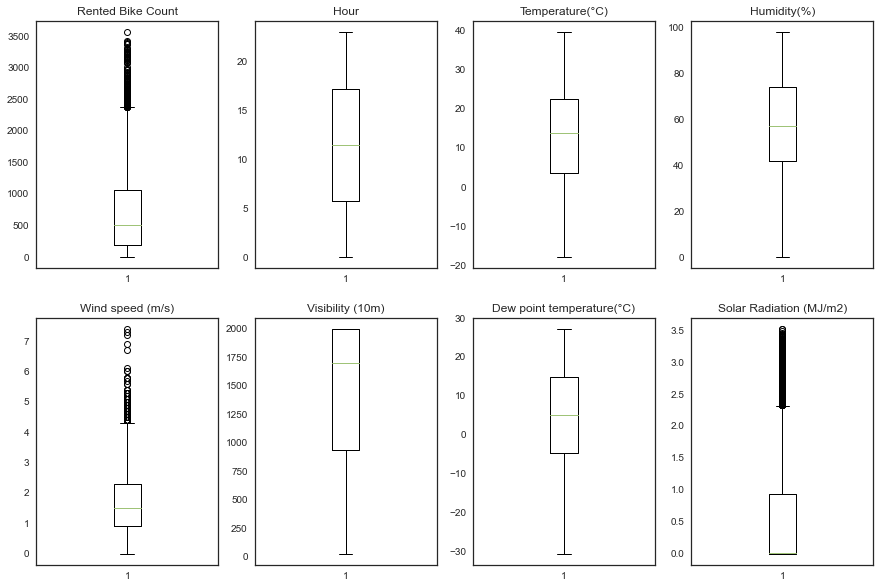

In [21]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(241)
plt.boxplot(df['Rented Bike Count'])
ax.set_title('Rented Bike Count')
ax=plt.subplot(242)
plt.boxplot(df['Hour'])
ax.set_title('Hour')
ax=plt.subplot(243)
plt.boxplot(df['Temperature(°C)'])
ax.set_title('Temperature(°C)')
ax=plt.subplot(244)
plt.boxplot(df['Humidity(%)'])
ax.set_title('Humidity(%)')
ax=plt.subplot(245)
plt.boxplot(df['Wind speed (m/s)'])
ax.set_title('Wind speed (m/s)')
ax=plt.subplot(246)
plt.boxplot(df['Visibility (10m)'])
ax.set_title('Visibility (10m)')
ax=plt.subplot(247)
plt.boxplot(df['Dew point temperature(°C)'])
ax.set_title('Dew point temperature(°C)')
ax=plt.subplot(248)
plt.boxplot(df['Solar Radiation (MJ/m2)'])
ax.set_title('Solar Radiation (MJ/m2)')

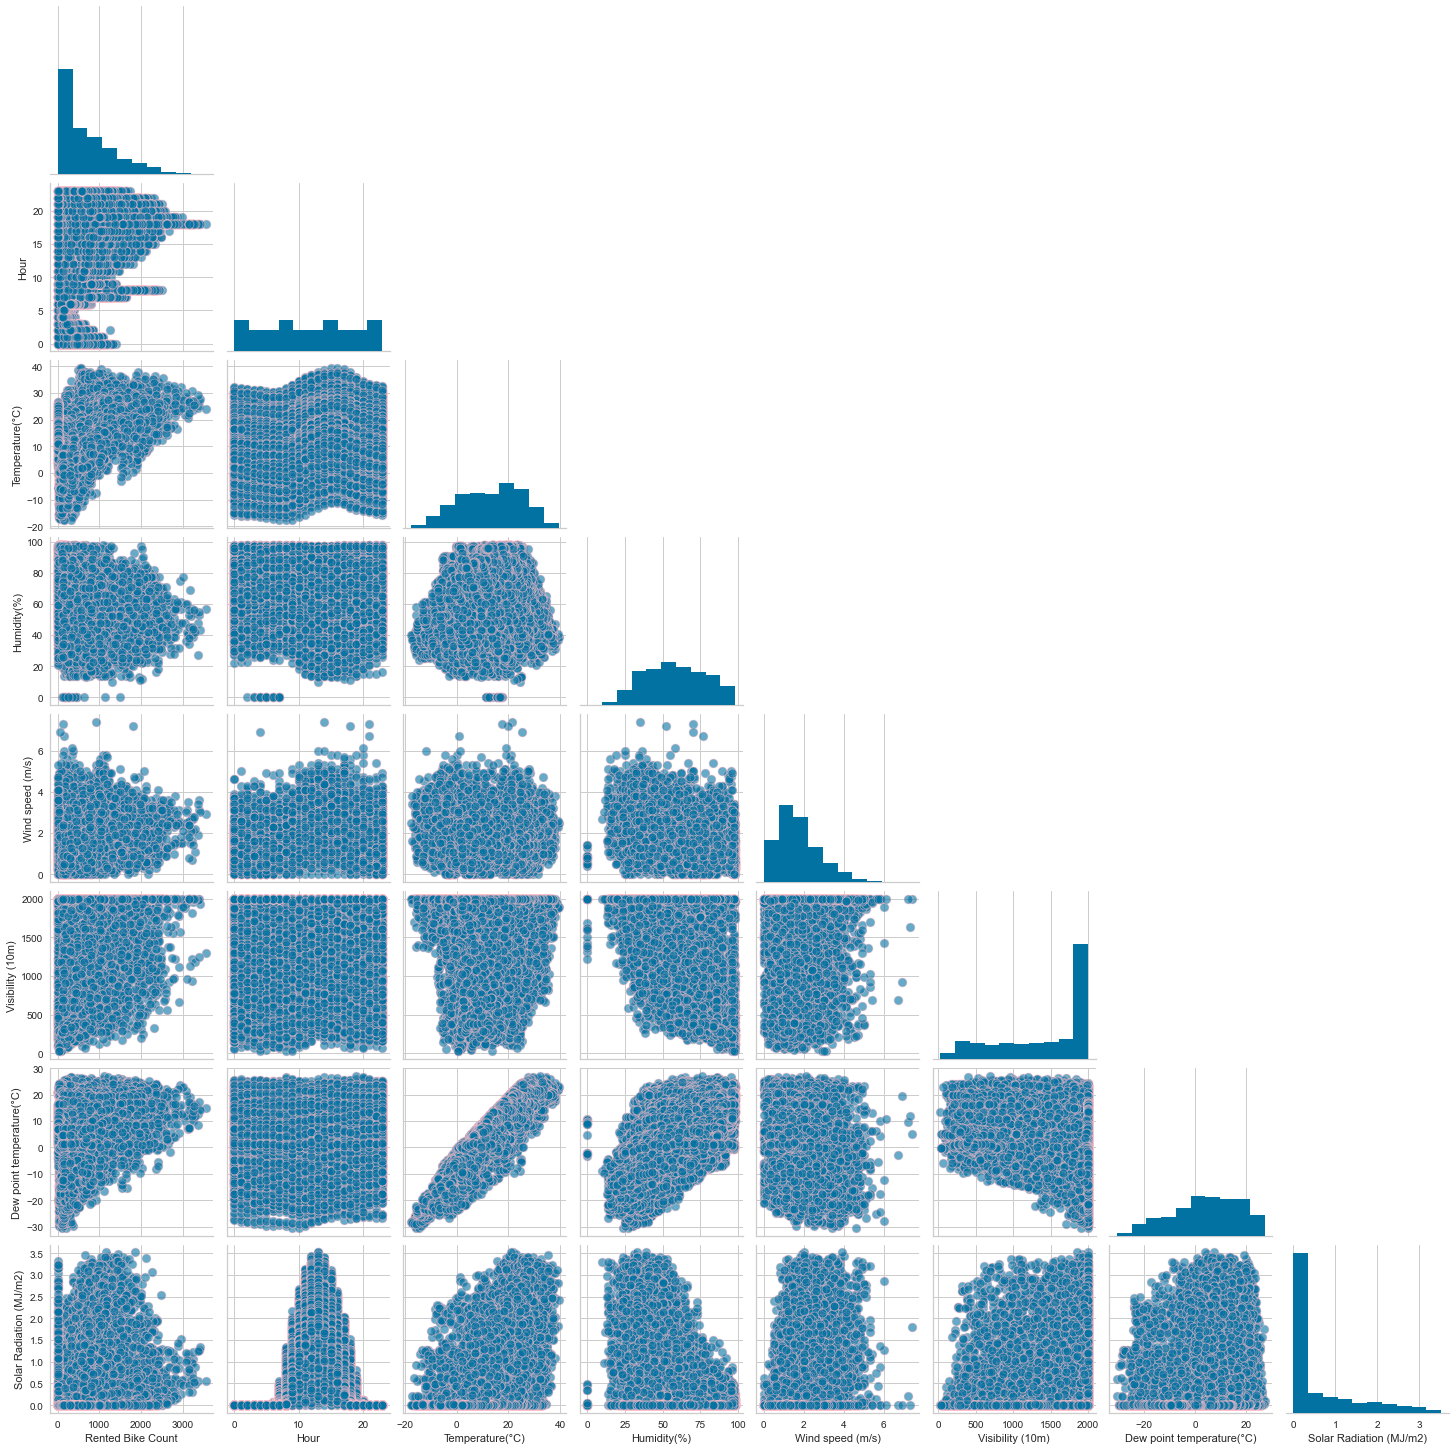

In [7]:
g = sns.pairplot(df
                 ,vars = ['Rented Bike Count',  'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']
                 ,diag_kind = 'hist'
                 ,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'pink'}
                 ,corner=True)

In [12]:
num_df = df.iloc[:, list(range(11))]
num_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [13]:
num_df_corr = num_df.corr()
num_df_corr
highlight = num_df_corr.round(2).style.background_gradient(cmap='coolwarm')
highlight

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410000,0.540000,-0.200000,0.120000,0.200000,0.380000,0.260000,-0.120000,-0.140000
Hour,0.410000,1.000000,0.120000,-0.240000,0.290000,0.100000,0.000000,0.150000,0.010000,-0.020000
Temperature(°C),0.540000,0.120000,1.000000,0.160000,-0.040000,0.030000,0.910000,0.350000,0.050000,-0.220000
Humidity(%),-0.200000,-0.240000,0.160000,1.000000,-0.340000,-0.540000,0.540000,-0.460000,0.240000,0.110000
Wind speed (m/s),0.120000,0.290000,-0.040000,-0.340000,1.000000,0.170000,-0.180000,0.330000,-0.020000,-0.000000
Visibility (10m),0.200000,0.100000,0.030000,-0.540000,0.170000,1.000000,-0.180000,0.150000,-0.170000,-0.120000
Dew point temperature(°C),0.380000,0.000000,0.910000,0.540000,-0.180000,-0.180000,1.000000,0.090000,0.130000,-0.150000
Solar Radiation (MJ/m2),0.260000,0.150000,0.350000,-0.460000,0.330000,0.150000,0.090000,1.000000,-0.070000,-0.070000
Rainfall(mm),-0.120000,0.010000,0.050000,0.240000,-0.020000,-0.170000,0.130000,-0.070000,1.000000,0.010000
Snowfall (cm),-0.140000,-0.020000,-0.220000,0.110000,-0.000000,-0.120000,-0.150000,-0.070000,0.010000,1.000000


Spearman correlation is computed as a measure of monotonous relationships between two features or variables. A correlation value of 1 is considered as a total positive correlation, −1 is considered total negative correlation, and if 0 no correlation exists between the variable. The linear regression line fits are shown in red for each pair.

Positive correlation between the count and Temp (0.54). It ensures that the demand for the rented bike rises when the temperature increases. The higher the temperature, the more rental bikes are used. The second significant correlation is between count and hour (0.39). This indicates a positive correlation as the day gets busier by the hour of the day. Positive correlations are also notable between count and wind, visb, dew and solar. There is a negative correlation of (−0.22), (−0.28) and (−0.22) between count and humid, count and rain, count and snow respectively, which signifies that humidity, rainfall and snow are the factors influencing rental bike usage in a negative manner. In other words the bike Usage decreases when the humidity or rain or snow value increases.

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

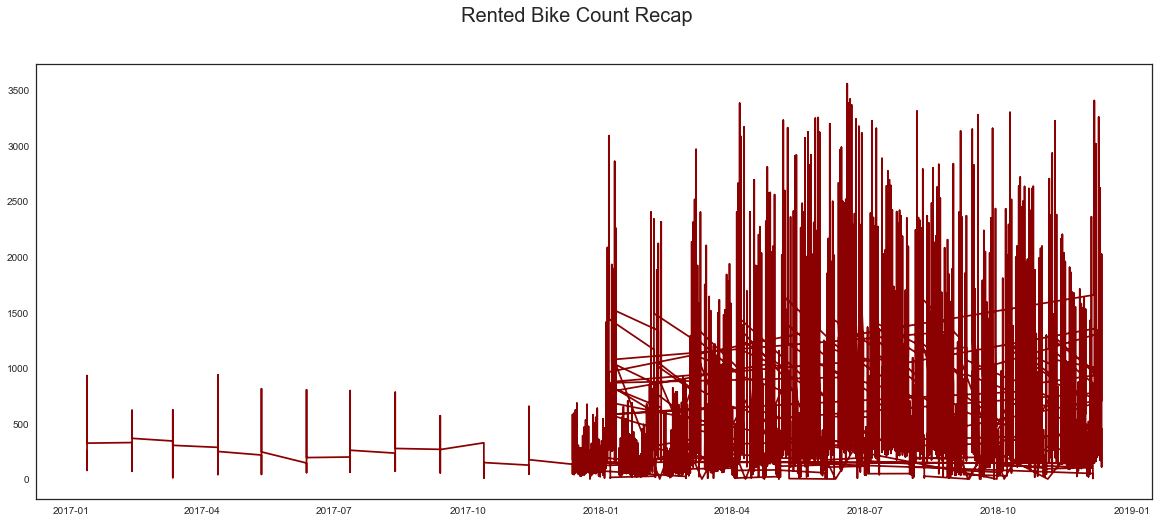

In [46]:
x = df['Date']
y = df['Rented Bike Count']

fig = plt.figure(figsize=(20,8))
fig.suptitle('Rented Bike Count Recap', size=20)

ax1 = fig.add_subplot(111)
ax1.plot(x,y, color='darkred')

plt.show()

In [52]:
df2 = df.copy()

In [55]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [56]:
df2 = df2[df2['Date'].dt.month == 11]
df2.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
240,2017-11-12,125,0,-2.5,39,3.4,2000,-14.5,0.0,0.0,0.0,Winter,No Holiday,Yes
241,2017-11-12,111,1,-3.4,36,3.8,2000,-16.3,0.0,0.0,0.0,Winter,No Holiday,Yes
242,2017-11-12,67,2,-4.2,35,3.4,2000,-17.4,0.0,0.0,0.0,Winter,No Holiday,Yes
243,2017-11-12,45,3,-4.7,38,2.4,2000,-16.8,0.0,0.0,0.0,Winter,No Holiday,Yes
244,2017-11-12,44,4,-5.2,35,3.2,2000,-18.3,0.0,0.0,0.0,Winter,No Holiday,Yes
